In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


def loading_housing_data():
    return pd.read_csv("Melbourne_housing_extra_data.csv")

housing_data=loading_housing_data()
housing_data.shape



(14246, 19)

In [66]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 19 columns):
Suburb          14242 non-null object
Address         14232 non-null object
Rooms           14222 non-null float64
Type            14222 non-null object
Price           11069 non-null float64
Method          14222 non-null object
SellerG         14222 non-null object
Date            14222 non-null object
Distance        14222 non-null float64
Postcode        14222 non-null float64
Bedroom2        11202 non-null float64
Bathroom        11202 non-null float64
Car             11202 non-null float64
Landsize        11185 non-null float64
BuildingArea    6168 non-null float64
YearBuilt       7099 non-null float64
CouncilArea     11183 non-null object
Lattitude       11306 non-null object
Longtitude      11307 non-null object
dtypes: float64(10), object(9)
memory usage: 2.1+ MB


In [67]:
housing_data['Type'].isnull().sum()

24

In [68]:
housing_data['Suburb'].isnull().sum()

4

In [69]:
#housing_data[housing['Method'].isnull()]

housing_data[housing_data['Method'].isnull()].sum()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
1156,RE,;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157,RE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,RE,;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,RE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2577,RE,;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2578,RE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,RE,;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,RE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3266,RE,;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3267,RE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
housing_data_dropped = housing_data.dropna(subset=["Method", "Type", "Suburb"])
housing_data_dropped.shape

(14222, 19)

In [71]:
housing_data_dropped['Suburb'].isnull().sum()

0

In [72]:
housing['Suburb'] = housing['Suburb'].astype(str)
housing['Type'] = housing['Type'].astype(str)
housing['Method'] = housing['Method'].astype(str)

In [73]:
housing["Lattitude"] = housing.Lattitude.convert_objects(convert_numeric=True)
housing["Longtitude"] = housing.Longtitude.convert_objects(convert_numeric=True)

c:\users\arjun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
c:\users\arjun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [74]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944


In [75]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,14222.000000,1.106900e+04,14222.000000,14222.000000,11202.000000,11202.000000,11202.000000,11185.000000,6168.000000,7099.000000,11301.000000,11300.000000
mean,2.893967,1.076961e+06,8.621635,3098.212066,2.840564,1.530887,1.537850,469.181404,146.861539,1960.194534,-37.811451,144.990292
std,0.985804,6.598991e+05,3.559325,59.575864,1.013490,0.717342,0.959796,1175.477306,135.265201,38.119790,0.060307,0.073198
min,1.000000,8.500000e+04,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,-37.946200,144.788610
25%,2.000000,6.400000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,141.000000,90.000000,1930.000000,-37.854000,144.940300
50%,3.000000,9.000000e+05,8.800000,3085.000000,3.000000,1.000000,1.000000,351.000000,125.000000,1961.000000,-37.809100,144.997635
75%,3.000000,1.330500e+06,11.200000,3146.000000,3.000000,2.000000,2.000000,626.000000,176.000000,1998.000000,-37.764900,145.046400
max,12.000000,8.000000e+06,15.000000,3207.000000,30.000000,12.000000,26.000000,75100.000000,6791.000000,2106.000000,-37.674130,145.143800


In [76]:
#housing["Suburb"].value_counts()

In [77]:
housing["Method"].value_counts()

S     8406
SP    2013
PI    1883
VB    1098
SN     587
PN     121
W       51
SA      51
SS      12
Name: Method, dtype: int64

In [78]:
#housing["SellerG"].value_counts()

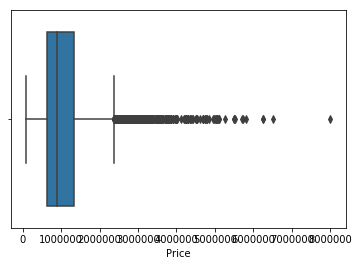

In [79]:
#checking the price outliers
import seaborn as sns
sns.boxplot(x=housing['Price'])

In [80]:
outliers_price = housing


In [81]:
housing['Price'].isnull().sum()

3153

In [82]:
housin_price_withoutnull = housing.dropna(subset=["Price"])

housin_price_withoutnull.shape

(11069, 19)

In [83]:
housin_price_withoutnull['log_Price']=np.log(housin_price_withoutnull['Price']).copy()

c:\users\arjun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


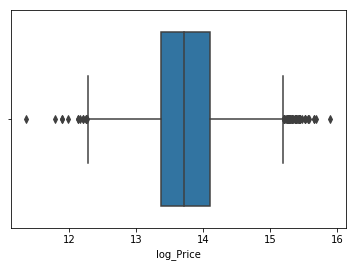

In [84]:
sns.boxplot(x=housin_price_withoutnull['log_Price'])

In [85]:
q75, q25 = np.percentile(housin_price_withoutnull.log_Price.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

In [86]:
housin_price_withoutnull['Outlier'] = 0
 
housin_price_withoutnull.loc[housin_price_withoutnull['log_Price'] < min, 'Outlier'] = 1
housin_price_withoutnull.loc[housin_price_withoutnull['log_Price'] > max, 'Outlier'] = 1

c:\users\arjun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\arjun\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
housin_price_withoutnull['Outlier'].loc[housin_price_withoutnull['Outlier']==1].count()

79

In [88]:
housin_price_withoutnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11069 entries, 1 to 14240
Data columns (total 21 columns):
Suburb          11069 non-null object
Address         11069 non-null object
Rooms           11069 non-null float64
Type            11069 non-null object
Price           11069 non-null float64
Method          11069 non-null object
SellerG         11069 non-null object
Date            11069 non-null object
Distance        11069 non-null float64
Postcode        11069 non-null float64
Bedroom2        8741 non-null float64
Bathroom        8741 non-null float64
Car             8741 non-null float64
Landsize        8730 non-null float64
BuildingArea    4746 non-null float64
YearBuilt       5474 non-null float64
CouncilArea     8729 non-null object
Lattitude       8825 non-null float64
Longtitude      8805 non-null float64
log_Price       11069 non-null float64
Outlier         11069 non-null int64
dtypes: float64(13), int64(1), object(7)
memory usage: 1.9+ MB


In [99]:
#housin_price_withoutnull=housin_price_withoutnull.drop(housin_price_withoutnull[housin_price_withoutnull.log_Price == 1].index)


housin_price_withoutnull=housin_price_withoutnull[housin_price_withoutnull.Outlier != 1]

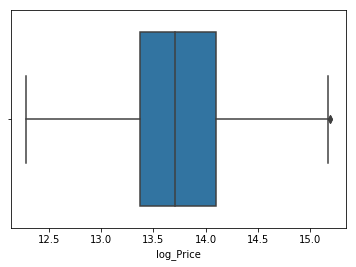

In [100]:
sns.boxplot(x=housin_price_withoutnull['log_Price'])

In [101]:
#housin_price_withoutnull = housin_price_withoutnull[housin_price_withoutnull["score"] > 50]

In [102]:
housin_price_withoutnull['Outlier'].loc[housin_price_withoutnull['Outlier']==1].count()

0

In [103]:
housing.corr().Price.sort_values(ascending=False)

Price           1.000000
Rooms           0.556374
Bedroom2        0.532209
Bathroom        0.515975
BuildingArea    0.361064
Car             0.287505
Postcode        0.273237
Longtitude      0.253092
Landsize        0.071443
Distance       -0.073167
Lattitude      -0.243165
YearBuilt      -0.319787
Name: Price, dtype: float64

In [15]:
housing["CouncilArea"].value_counts()

Boroondara       1351
Moreland         1140
Stonnington       953
Moonee Valley     919
Darebin           903
Glen Eira         836
Port Phillip      693
Maribyrnong       685
Yarra             677
Banyule           546
Bayside           506
Melbourne         458
Hobsons Bay       404
Brimbank          301
Manningham        255
Whitehorse        237
Monash            216
Kingston           82
Hume               21
Name: CouncilArea, dtype: int64

In [16]:
housing["Type"].value_counts()

h    9080
u    3568
t    1574
Name: Type, dtype: int64

In [9]:
housing.corr().Price.sort_values(ascending=False)

Price           1.000000
Rooms           0.556374
Bedroom2        0.532209
Bathroom        0.515975
BuildingArea    0.361064
Car             0.287505
Postcode        0.273237
Landsize        0.071443
Distance       -0.073167
YearBuilt      -0.319787
Name: Price, dtype: float64

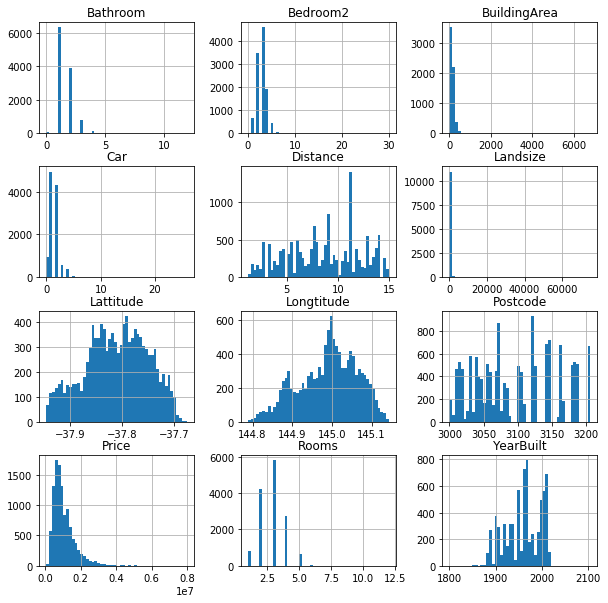

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10,10))
plt.show()

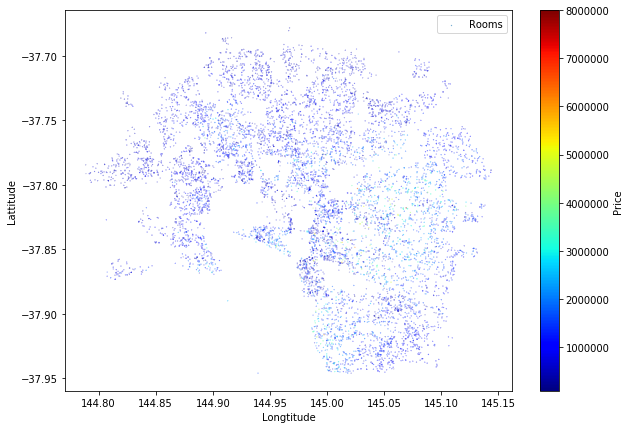

In [19]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=1,
    s=housing["Rooms"]/100, label="Rooms", figsize=(10,7),
    c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [20]:
housing["Rooms_per_YearBuilt"] = housing["Rooms"]/housing["YearBuilt"]
#housing["room_per_buildingArea1"] = housing["BuildingArea"]/housing["Rooms"]
#housing["bedroom_per_buildingArea1"] = housing["BuildingArea"]/housing["Bedroom2"]
housing["Distnce_per_household"]=housing["BuildingArea"]/housing["Distance"]
#housing["Rooms_per_Landsize1"]=housing["Landsize"]/housing["Rooms"]

housing["RoomsSum"] = housing["Rooms"] + housing["Bedroom2"] + housing["Bathroom"] + housing["Car"]
#housing["GardenArea"] = housing["Landsize"] - housing["BuildingArea"]
#housing['RoomPerGardenArea1'] = housing["BuildingArea"]/housing["RoomsSum"]

In [21]:
housing.corr().Price.sort_values(ascending=False)

Price                    1.000000
Rooms_per_YearBuilt      0.614529
RoomsSum                 0.582268
Rooms                    0.556374
Bedroom2                 0.532209
Bathroom                 0.515975
BuildingArea             0.361064
Distnce_per_household    0.342046
Car                      0.287505
Postcode                 0.273237
Longtitude               0.253092
Landsize                 0.071443
Distance                -0.073167
Lattitude               -0.243165
YearBuilt               -0.319787
Name: Price, dtype: float64

In [22]:
#housing = housing.drop('YearBuilt',axis=1)
#housing = housing.drop('Distance',axis=1)
#housing = housing.drop('Landsize',axis=1)

In [23]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,NaN,NaN,6.0
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,NaN,NaN,6.0
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,0.001053,31.6,5.0
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,NaN,NaN,9.0
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,0.001579,60.0,8.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BAC235E828>,
      dtype=object)

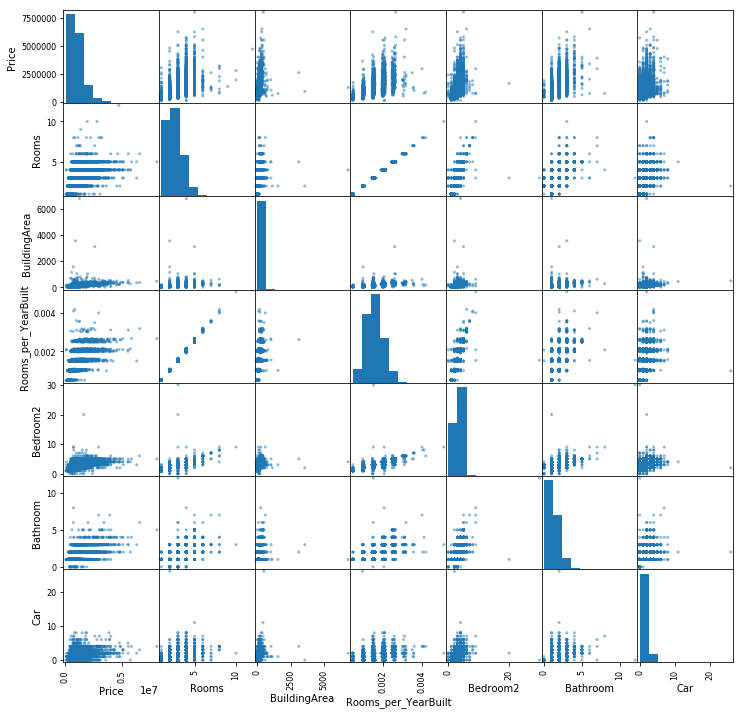

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "BuildingArea", "Rooms_per_YearBuilt", "Bedroom2", "Bathroom",
              "Car"]
scatter_matrix(housing[attributes], figsize=(12, 12))

In [25]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set_impu = train_set.drop("Suburb", axis=1)
train_set_impu = train_set_impu.drop("Address", axis=1) #drop
train_set_impu = train_set_impu.drop("Method", axis=1)
train_set_impu = train_set_impu.drop("SellerG", axis=1)
train_set_impu = train_set_impu.drop("CouncilArea", axis=1)
train_set_impu = train_set_impu.drop("Type", axis=1)
train_set_impu = train_set_impu.drop("Date", axis=1)
train_set_impu = train_set_impu.drop("Lattitude", axis=1)
train_set_impu = train_set_impu.drop("Longtitude", axis=1)
#train_set_impu = train_set_impu.drop("YearBuilt", axis=1)
#train_set_impu = train_set_impu.drop("Postcode", axis=1)
train_set_num = train_set_impu.copy()

In [26]:
housing[housing.isnull().any(axis=1)].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,NaN,NaN,6.0
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,NaN,NaN,6.0
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,NaN,NaN,9.0
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/3/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,NaN,NaN,9.0
7,Abbotsford,16 Maugie St,4.0,h,NaN,SN,Nelson,6/8/2016,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra,-37.7965,144.9965,0.001994,88.0,11.0


In [27]:
housing.corr().Price.sort_values(ascending=False)

Price                    1.000000
Rooms_per_YearBuilt      0.614529
RoomsSum                 0.582268
Rooms                    0.556374
Bedroom2                 0.532209
Bathroom                 0.515975
BuildingArea             0.361064
Distnce_per_household    0.342046
Car                      0.287505
Postcode                 0.273237
Longtitude               0.253092
Landsize                 0.071443
Distance                -0.073167
Lattitude               -0.243165
YearBuilt               -0.319787
Name: Price, dtype: float64

In [28]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
#housing_num = housing.drop("Price", axis=1)
imputer.fit(train_set_impu)

imputer.statistics_

array([3.00000000e+00, 8.99000000e+05, 8.80000000e+00, 3.08400000e+03,
       3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.50000000e+02,
       1.24000000e+02, 1.96500000e+03, 1.52091265e-03, 1.59782609e+01,
       9.00000000e+00])

In [29]:
train_set_impu.median().values

array([3.00000000e+00, 8.99000000e+05, 8.80000000e+00, 3.08400000e+03,
       3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.50000000e+02,
       1.24000000e+02, 1.96500000e+03, 1.52091265e-03, 1.59782609e+01,
       9.00000000e+00])

In [30]:
X = imputer.transform(train_set_impu)
housing_transformed_trained = pd.DataFrame(X, columns=train_set_impu.columns)
print(len(housing_transformed_trained), "housing_transformed_trained ")


11377 housing_transformed_trained 


In [31]:
num_attribs = list(train_set_num)
print(num_attribs)

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Rooms_per_YearBuilt', 'Distnce_per_household', 'RoomsSum']


In [32]:
train_set_num.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
count,11377.000000,8.869000e+03,11377.000000,11377.000000,8982.000000,8982.000000,8982.000000,8968.000000,4931.000000,5678.000000,5678.000000,4931.000000,8982.000000
mean,2.888108,1.078286e+06,8.635361,3098.150303,2.831218,1.529169,1.537965,474.188894,145.206569,1960.565692,0.001474,21.142995,8.766867
std,0.978072,6.657436e+05,3.563945,59.668930,0.986160,0.713015,0.976882,1276.532358,128.375477,38.096669,0.000515,18.856597,2.964208
min,1.000000,8.500000e+04,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000496,0.000000,2.000000
25%,2.000000,6.400000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,141.750000,90.000000,1930.000000,0.001020,10.411665,6.000000
50%,3.000000,8.990000e+05,8.800000,3084.000000,3.000000,1.000000,1.000000,350.000000,124.000000,1965.000000,0.001521,15.978261,9.000000
75%,3.000000,1.330000e+06,11.200000,3146.000000,3.000000,2.000000,2.000000,624.000000,175.000000,1998.000000,0.001983,25.423729,10.000000
max,12.000000,8.000000e+06,15.000000,3207.000000,20.000000,8.000000,26.000000,75100.000000,6791.000000,2018.000000,0.005076,575.508475,32.000000


In [33]:
#housing_transformed_trained['Suburb'] = train_set['Suburb'].copy()
#housing_transformed_trained['Method'] = train_set['Method'].copy()
#housing_transformed_trained['Type'] = train_set['Type'].copy()
#housing_transformed_trained['CouncilArea'] = train_set['CouncilArea'].copy() //many nulls

housing_transformed_trained.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
0,2.0,1300000.0,9.3,3145.0,3.0,1.0,1.0,350.0,124.0,1965.0,0.001521,15.978261,9.0
1,2.0,899000.0,11.2,3127.0,2.0,1.0,1.0,464.0,117.0,1995.0,0.001003,10.446429,6.0
2,3.0,670000.0,11.1,3025.0,3.0,1.0,1.0,350.0,124.0,1965.0,0.001521,15.978261,9.0
3,3.0,899000.0,8.0,3040.0,3.0,1.0,1.0,350.0,124.0,1965.0,0.001521,15.978261,9.0
4,3.0,765000.0,7.8,3058.0,3.0,1.0,1.0,350.0,124.0,1965.0,0.001521,15.978261,9.0


In [34]:
list(train_set_num)

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Rooms_per_YearBuilt',
 'Distnce_per_household',
 'RoomsSum']

In [35]:
#housing['Suburb']

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from future_encoders import ColumnTransformer,make_column_transformer
from future_encoders import OneHotEncoder


from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs = list(train_set_num)
#num_attribs.remove('Price')
cat_attribs = ["Type"] #"Method", "Type"

num_pipeline = Pipeline([
      #  ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
#med_train_set = num_pipeline.fit_transform(housing_transformed_trained)
#print(med_train_set)

full_pipeline = ColumnTransformer([
       ('num', num_pipeline, num_attribs),
#        ('cat', OneHotEncoder(), cat_attribs),
    ])


housing_train_set_prepared = full_pipeline.fit_transform(housing_transformed_trained)

print(housing_train_set_prepared)

[[-0.90805866  0.44094444  0.18649791 ...  0.06372648 -0.17662069
   0.06984079]
 [-0.90805866 -0.23590777  0.71963836 ... -1.35801761 -0.6130917
  -1.0685241 ]
 [ 0.11440604 -0.62243934  0.69157834 ...  0.06372648 -0.17662069
   0.06984079]
 ...
 [ 0.11440604 -0.56040862  0.5232182  ... -0.01816258 -0.49802671
   0.44929576]
 [ 2.15933545  2.04445965  0.29873801 ...  2.72839367  1.45844122
   2.34657058]
 [-0.90805866 -0.23590777 -1.77770375 ... -1.22054753  3.22815945
  -1.0685241 ]]


In [37]:
from future_encoders import OneHotEncoder
encoder = OneHotEncoder()
suburb_cat_encoded,suburb_categories = train_set["Suburb"].factorize()
suburb_cat_1hot = encoder.fit_transform(suburb_cat_encoded.reshape(-1,1))

type_cat_encoded,type_categories = train_set["Type"].factorize()
type_cat_1hot = encoder.fit_transform(type_cat_encoded.reshape(-1,1))

method_cat_encoded,method_categories = train_set["Method"].factorize()
method_cat_1hot = encoder.fit_transform(method_cat_encoded.reshape(-1,1))


suburb_cat_1hot
suburb_cat_encoded.sort()
#print(suburb_categories)
suburb_cat_encoded
suburb_cat_1hot.toarray()

a = np.concatenate([X, method_cat_1hot.toarray(), type_cat_1hot.toarray()], axis=1)
col = num_attribs + method_categories.tolist() + type_categories.tolist()

housing_train_encoded = pd.DataFrame(data=a[0:,0:], columns=col[0:])

housing_train_encoded.head()
#type_cat_encoded
#col

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,VB,PI,SN,PN,W,SS,SA,h,t,u
0,2.0,1300000.0,9.3,3145.0,3.0,1.0,1.0,350.0,124.0,1965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,899000.0,11.2,3127.0,2.0,1.0,1.0,464.0,117.0,1995.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,670000.0,11.1,3025.0,3.0,1.0,1.0,350.0,124.0,1965.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,899000.0,8.0,3040.0,3.0,1.0,1.0,350.0,124.0,1965.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,765000.0,7.8,3058.0,3.0,1.0,1.0,350.0,124.0,1965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
housing_transformed_trained.corr().Price.sort_values(ascending=False)

Price                    1.000000
Rooms                    0.464249
RoomsSum                 0.427391
Bedroom2                 0.391628
Rooms_per_YearBuilt      0.369623
Bathroom                 0.358532
Distnce_per_household    0.253076
BuildingArea             0.235134
Postcode                 0.230832
Car                      0.211242
Landsize                 0.054528
Distance                -0.056573
YearBuilt               -0.190932
Name: Price, dtype: float64

In [39]:
housing_transformed_trained.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
count,11377.000000,1.137700e+04,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000
mean,2.888108,1.038763e+06,8.635361,3098.150303,2.866749,1.417773,1.424717,447.892766,133.191315,1962.786939,0.001498,18.216751,8.815944
std,0.978072,5.924744e+05,3.563945,59.668930,0.878921,0.669254,0.895261,1134.476255,85.161450,27.003535,0.000365,12.674554,2.635475
min,1.000000,8.500000e+04,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000496,0.000000,2.000000
25%,2.000000,7.100000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,192.000000,124.000000,1965.000000,0.001521,15.978261,7.000000
50%,3.000000,8.990000e+05,8.800000,3084.000000,3.000000,1.000000,1.000000,350.000000,124.000000,1965.000000,0.001521,15.978261,9.000000
75%,3.000000,1.200000e+06,11.200000,3146.000000,3.000000,2.000000,2.000000,581.000000,124.000000,1965.000000,0.001521,15.978261,10.000000
max,12.000000,8.000000e+06,15.000000,3207.000000,20.000000,8.000000,26.000000,75100.000000,6791.000000,2018.000000,0.005076,575.508475,32.000000


In [40]:
from sklearn.linear_model import LinearRegression

housing_train_X = housing_transformed_trained.drop("Price", axis=1)
housing_train_Y = housing_transformed_trained["Price"].copy()


lin_reg = LinearRegression()
lin_reg.fit(housing_train_X, housing_train_Y) #THIS GIVES THE EQUATION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:

#print("Labels:", list(housing_test_Y))

#Computing prediction on training
print("Predictions:", lin_reg.predict(housing_train_X))








Predictions: [ 841117.23483505  647529.17786605  774537.04727212 ...  906971.57502187
 1676170.01224843 1096917.52447159]


In [42]:
# Now we shall compare the train predicted Y with the train actual Y(which is is just one price column)

import numpy as np
from sklearn.metrics import mean_squared_error
Train_Y_predicted=lin_reg.predict(housing_train_X)

lin_mse = mean_squared_error(housing_train_Y, Train_Y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

479433.85317980824

In [47]:
lin_scores = cross_val_score(lin_reg, housing_train_X, housing_train_Y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [478631.45689385 472715.31422318 477731.71329699 452071.61345018
 494610.41422026 506549.54403679 512063.78140947 459053.84662873
 553217.98489754 482212.76218705]
Mean: 488885.8431244058
Standard deviation: 27931.052463445038


In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_train_X, housing_train_Y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
# Predicting value of Y

Train_Y_predicted_TREE=tree_reg.predict(housing_train_X)

tree_mse = mean_squared_error(housing_train_Y, Train_Y_predicted_TREE)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

194788.84988735922

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_train_X, housing_train_Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [586694.22451059 577066.55554332 569246.11906826 558078.62023799
 604369.53080427 631997.83152927 564676.69957905 580663.33595373
 540553.80641141 566083.18160305]
Mean: 577942.9905240944
Standard deviation: 24269.05394276861


In [48]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(housing_train_X, housing_train_Y)

c:\users\arjun\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
forest_scores = cross_val_score(forest_reg, housing_train_X, housing_train_Y,
                             scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [463896.30144349 473531.91166436 452498.09601034 452552.96166912
 521262.53578787 498330.40346773 458154.27869052 457482.23001453
 455567.43098383 460499.87560456]
Mean: 469377.60253363487
Standard deviation: 21639.31137196551


In [50]:
#Imputing the test data


test_set_impu = test_set.drop("Suburb", axis=1)
test_set_impu = test_set_impu.drop("Address", axis=1)
test_set_impu = test_set_impu.drop("Method", axis=1)
test_set_impu = test_set_impu.drop("SellerG", axis=1)
test_set_impu = test_set_impu.drop("CouncilArea", axis=1)
test_set_impu = test_set_impu.drop("Type", axis=1)
test_set_impu = test_set_impu.drop("Date", axis=1)
test_set_impu = test_set_impu.drop("Lattitude", axis=1)
test_set_impu = test_set_impu.drop("Longtitude", axis=1)
#test_set_impu = test_set_impu.drop("YearBuilt", axis=1)
#test_set_impu = test_set_impu.drop("Postcode", axis=1)

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
#housing_num = housing.drop("Price", axis=1)
imputer.fit(test_set_impu)

imputer.statistics_


X_test = imputer.transform(test_set_impu)
housing_transformed_test = pd.DataFrame(X, columns=test_set_impu.columns)
#print(len(housing_transformed_test), "housing_transformed_trained ")

In [51]:
#dividing test into X and Y

housing_test_X = housing_transformed_test.drop("Price", axis=1)
housing_test_Y = housing_transformed_test["Price"].copy()


print("Predictions:", lin_reg.predict(housing_test_X))

#print("Labels:", list(housing_test_Y))

Predictions: [ 841117.23483505  647529.17786605  774537.04727212 ...  906971.57502187
 1676170.01224843 1096917.52447159]


In [52]:
# Now we shall compare the test predicted Y with the test actual Y (which is is just one price column)

import numpy as np
from sklearn.metrics import mean_squared_error
test_Y_predicted=lin_reg.predict(housing_test_X)

lin_mse = mean_squared_error(housing_test_Y, test_Y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

479433.85317980824

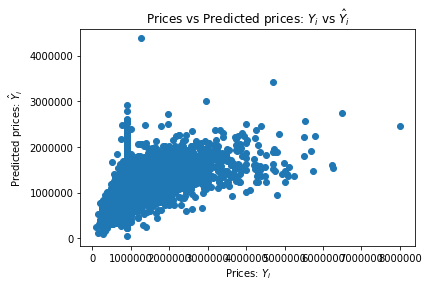

In [53]:
import matplotlib.pyplot as plt

plt.scatter(housing_test_Y, test_Y_predicted)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [54]:
#housing.describe()

In [55]:
Test_Y_predicted_TREE=tree_reg.predict(housing_test_X)

tree_mse = mean_squared_error(housing_test_Y, Test_Y_predicted_TREE)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

194788.84988735922

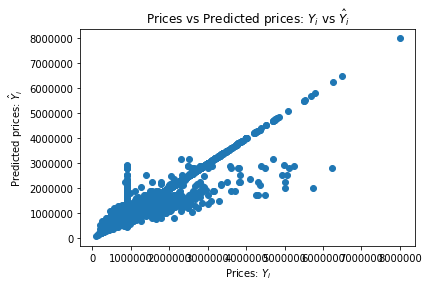

In [56]:
import matplotlib.pyplot as plt

plt.scatter(housing_test_Y, Test_Y_predicted_TREE)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [64]:
#GRidsearch on Forrest_Regressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_train_X, housing_train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [60]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [61]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

506376.41402603284 {'max_features': 2, 'n_estimators': 3}
466214.6563153962 {'max_features': 2, 'n_estimators': 10}
454618.8899877664 {'max_features': 2, 'n_estimators': 30}
497429.7873942504 {'max_features': 4, 'n_estimators': 3}
462530.8289484516 {'max_features': 4, 'n_estimators': 10}
453698.44546889054 {'max_features': 4, 'n_estimators': 30}
500042.6458114172 {'max_features': 6, 'n_estimators': 3}
464239.8197249318 {'max_features': 6, 'n_estimators': 10}
454629.76205442444 {'max_features': 6, 'n_estimators': 30}
504057.9261268424 {'max_features': 8, 'n_estimators': 3}
463640.62169426744 {'max_features': 8, 'n_estimators': 10}
453777.71404637326 {'max_features': 8, 'n_estimators': 30}
506519.80440073594 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
471849.38801801595 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
496835.7215484447 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
472963.1115642702 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [65]:
#lowest 453698.44546889054 {'max_features': 4, 'n_estimators': 30}

final_model=grid_search.best_estimator_

final_predictions=final_model.predict(housing_test_X)

final_mse = mean_squared_error(housing_test_Y, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

247781.8678464364